<a href="https://colab.research.google.com/github/hungviet0304/DS_Final_project/blob/master/Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
import pandas as pd
import numpy as np
import os
import copy
import math
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [270]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier

# You can also import other things ...
# YOUR CODE HERE (OPTION)
import re
from sklearn import preprocessing

In [271]:
pwd = %pwd
if pwd != 'C:\\Users\\Admin\\Documents\\GitHub\\DS_Final_project\\data':
    %cd ./data

file_list = os.listdir()
data_tmp = []
for file in file_list:
    df = pd.read_csv(file)
    data_tmp.append(df)
final_df = pd.concat(data_tmp, axis = 0, ignore_index=True)
%cd ..

C:\Users\Admin\Documents\GitHub\DS_Final_project\data
C:\Users\Admin\Documents\GitHub\DS_Final_project


In [272]:
final_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,511977,$620.18M,7.0
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1624187,NaN,9.3
2,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,367194,NaN,8.6
3,Star Wars: Episode VII - The Force Awakens,138,"Three decades after the Empire's defeat, a...",2015,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,818309,$936.66M,7.9
4,Rogue One: A Star Wars Story,133,The daughter of an Imperial scientist join...,2016,"Action, Adventure, Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,511959,$532.18M,7.8


In [273]:
final_df.describe(include="all")

,title,runtime,des,date,genre,cast,director,vote,gross,rating
count,78450,78450,78447,78450.000000,78450,77035,55833,7.845000e+04,4529,78450.000000
unique,60555,552,57146,NaN,1014,61886,35901,NaN,1278,NaN
top,Run,0,Add a Plot,NaN,Documentary,Missy Jubilee,Kevin Dunn,NaN,$0.01M,NaN
freq,15,7605,8135,NaN,5444,26,98,NaN,342,NaN
mean,NaN,NaN,NaN,2014.172569,NaN,NaN,NaN,4.836305e+03,NaN,4.144744
std,NaN,NaN,NaN,26.032289,NaN,NaN,NaN,3.736042e+04,NaN,3.422669
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
50%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,1.400000e+01,NaN,5.500000
75%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,2.020000e+02,NaN,7.200000


In [274]:
df = final_df.copy()
df = df[df.rating != 0]
df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,511977,$620.18M,7.0
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1624187,NaN,9.3
2,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,367194,NaN,8.6
3,Star Wars: Episode VII - The Force Awakens,138,"Three decades after the Empire's defeat, a...",2015,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,818309,$936.66M,7.9
4,Rogue One: A Star Wars Story,133,The daughter of an Imperial scientist join...,2016,"Action, Adventure, Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,511959,$532.18M,7.8


In [275]:
# Tách X và y
y_sr = df["rating"] # sr là viết tắt của series
X_df = df.drop("rating", axis=1)

In [276]:
# Tách tập train và tập validation theo tỉ lệ 70%:30%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                              stratify=y_sr, random_state=0)

train_X_df.head().index

Int64Index([33273, 52310, 64394, 13478, 39926], dtype='int64')

In [277]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34181 entries, 33273 to 41741
Data columns (total 9 columns):
title       34181 non-null object
runtime     34181 non-null object
des         34181 non-null object
date        34181 non-null int64
genre       34181 non-null object
cast        33878 non-null object
director    25249 non-null object
vote        34181 non-null int64
gross       3136 non-null object
dtypes: int64(2), object(7)
memory usage: 2.6+ MB


In [278]:
val_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14649 entries, 32044 to 46456
Data columns (total 9 columns):
title       14649 non-null object
runtime     14649 non-null object
des         14649 non-null object
date        14649 non-null int64
genre       14649 non-null object
cast        14505 non-null object
director    10803 non-null object
vote        14649 non-null int64
gross       1393 non-null object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB


In [279]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
33273,Lint the Movie,101,Documents the life and work of cult SF author ...,2011,"Biography, Comedy, Sci-Fi","Alan Moore, Stewart Lee, Josie Long, Steve Aylett",Steve Aylett,13,NaN
52310,Broken Chains,0,Brianna married a man she thought would pr...,2017,"Action, Adventure, Biography","Denise Reed, Shannon Brown, Mark Vincent, Mich...",Shannon Brown,13,NaN
64394,The Tattooist,47,"In ""The Tattooist,"" Rooster Teeth's Geoff Rams...",2017,Documentary,"Geoff Ramsey, Griffon Ramsey, Millie Ramsey, B...",Mat Hames,17,NaN
13478,Fairy Fencer F: Advent Dark Force,0,A long time ago there was a conflict between a...,2016,"Action, Adventure, Fantasy","Takatsugu Awazu, Takuya Eguchi, Ayumi Fujimura...",NaN,64,NaN
39926,Wild Oats,86,Everything changes for Eva when she receiv...,2016,"Action, Adventure, Comedy","Shirley MacLaine, Jessica Lange, Demi Moore, P...",Andy Tennant,3053,$0.04M


In [280]:
#df = df.dropna(axis=0)
#df = df.drop_duplicates()

In [281]:
genre_rating_df = train_X_df["genre"].to_frame().join(train_y_sr)

In [282]:
genre_rating_df.head()

,genre,rating
33273,"Biography, Comedy, Sci-Fi",6.3
52310,"Action, Adventure, Biography",6.8
64394,Documentary,8.1
13478,"Action, Adventure, Fantasy",9.5
39926,"Action, Adventure, Comedy",5.7


Counter({'Comedy': 11851, 'Documentary': 9071, 'Drama': 8970, 'Action': 8827, 'Short': 6749, 'Adventure': 6738, 'Crime': 5151, 'Animation': 4879, 'Romance': 4203, 'Biography': 3647, 'Family': 1508, 'Thriller': 1409, 'Horror': 1405, 'Fantasy': 1330, 'History': 1289, 'Sci-Fi': 1037, 'Music': 972, 'Mystery': 864, 'Sport': 562, 'News': 208, 'Reality-TV': 204, 'War': 203, 'Musical': 189, 'Talk-Show': 97, 'Western': 77, 'Game-Show': 56})
len =  26


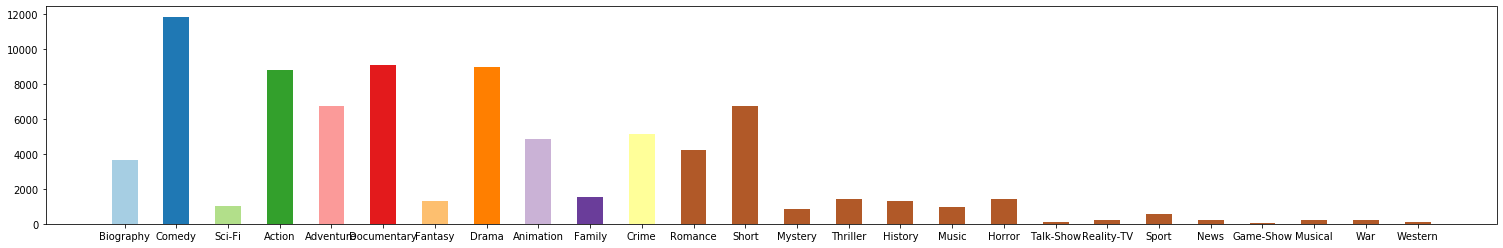

In [283]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

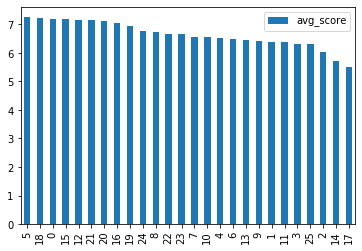

In [284]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [285]:
print(hist_df)

          genre  avg_score
5   Documentary   7.260765
18    Talk-Show   7.220619
0     Biography   7.196627
15      History   7.172847
12        Short   7.163743
21         News   7.157212
20        Sport   7.103737
16        Music   7.061317
19   Reality-TV   6.946569
24          War   6.777833
8     Animation   6.722730
22    Game-Show   6.664286
23      Musical   6.651852
7         Drama   6.574682
10        Crime   6.553543
4     Adventure   6.514767
6       Fantasy   6.488722
13      Mystery   6.469444
9        Family   6.406300
1        Comedy   6.376913
11      Romance   6.375517
3        Action   6.311623
25      Western   6.300000
2        Sci-Fi   6.043780
14     Thriller   5.721150
17       Horror   5.489751


- GENRE to number

In [286]:
#TF-IDF 

corpus = genre_rating_df["genre"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_genre = []
for i in range(len(genre_rating_df)):
    list_sum_genre.append(tfidf[i].sum())

In [287]:
sum_genre = pd.DataFrame(list_sum_genre)
sum_genre.isnull().values.any()


False

In [288]:
#add column into df
train_X_df["sum_genre"] = pd.Series(list_sum_genre).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [289]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre
33273,Lint the Movie,101,Documents the life and work of cult SF author ...,2011,"Biography, Comedy, Sci-Fi","Alan Moore, Stewart Lee, Josie Long, Steve Aylett",Steve Aylett,13,NaN,1.924142
52310,Broken Chains,0,Brianna married a man she thought would pr...,2017,"Action, Adventure, Biography","Denise Reed, Shannon Brown, Mark Vincent, Mich...",Shannon Brown,13,NaN,1.716472
64394,The Tattooist,47,"In ""The Tattooist,"" Rooster Teeth's Geoff Rams...",2017,Documentary,"Geoff Ramsey, Griffon Ramsey, Millie Ramsey, B...",Mat Hames,17,NaN,1.000000
13478,Fairy Fencer F: Advent Dark Force,0,A long time ago there was a conflict between a...,2016,"Action, Adventure, Fantasy","Takatsugu Awazu, Takuya Eguchi, Ayumi Fujimura...",NaN,64,NaN,1.671423
39926,Wild Oats,86,Everything changes for Eva when she receiv...,2016,"Action, Adventure, Comedy","Shirley MacLaine, Jessica Lange, Demi Moore, P...",Andy Tennant,3053,$0.04M,1.723743


- CAST to number

In [290]:
#replace NaN element in cast to "other"
#train_X_df["cast"] = train_X_df["cast"].fillna("other_cast");

In [291]:

cast_rating_df = train_X_df["cast"].to_frame().join(train_y_sr)

from collections import Counter

list_cast = list(cast_rating_df.cast)
unique_cast = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_cast += g.strip().split(", ")
dict_cast = Counter(unique_cast)

print("len = ",len(dict_cast))


len =  66630


In [292]:
occur_cast = Counter(dict_cast.values())  #Số lần xuất hiện - Số diễn viên

occur_cast = {k: v for k, v in sorted(occur_cast.items(), key=lambda item: item[1], reverse = True)}

dict(list(occur_cast.items())[:10])

{1: 44894,
 2: 12368,
 3: 3940,
 4: 1804,
 5: 999,
 6: 593,
 7: 447,
 8: 325,
 9: 250,
 10: 178}

In [293]:
cast_info = dict_cast.items()
cast_info = sorted(cast_info, key=lambda tup: tup[1], reverse=True)
cast_info[:10] #Từng diễn viên tương ứng với số lần đóng phim


[('Troy Baker', 108),
 ('Grey Griffin', 103),
 ('Laura Bailey', 93),
 ('Eric Bauza', 70),
 ('Eric Roberts', 70),
 ('Tara Strong', 69),
 ('Fred Tatasciore', 58),
 ('Steve Blum', 53),
 ('Danny Trejo', 53),
 ('Frank Welker', 52)]

# Nhận xét: Những diễn viên xuất hiện nhiều lần, thông thường được mọi người xem là hay. Những diễn viên xuất hiện ít, thường là những người mới hoặc diễn tệ.


In [294]:
#TF-IDF 

corpus = cast_rating_df.loc[cast_rating_df.cast.isnull() == False].cast.tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_cast = cast_rating_df.cast.copy()

list_sum = []
for i in range(len(cast_rating_df.loc[cast_rating_df.cast.isnull() == False])):
    list_sum.append(tfidf[i].sum())

list_sum_cast[list_sum_cast.isnull() == False] = list_sum
list_sum_cast[list_sum_cast.isnull() != False] = 0

In [295]:
sum_cast = pd.DataFrame(list_sum_cast)
sum_cast.isnull().values.any()


False

In [296]:
#add column into df
train_X_df["sum_cast"] = pd.Series(list_sum_cast).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [297]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast
33273,Lint the Movie,101,Documents the life and work of cult SF author ...,2011,"Biography, Comedy, Sci-Fi","Alan Moore, Stewart Lee, Josie Long, Steve Aylett",Steve Aylett,13,NaN,1.924142,2.73615
52310,Broken Chains,0,Brianna married a man she thought would pr...,2017,"Action, Adventure, Biography","Denise Reed, Shannon Brown, Mark Vincent, Mich...",Shannon Brown,13,NaN,1.716472,2.73785
64394,The Tattooist,47,"In ""The Tattooist,"" Rooster Teeth's Geoff Rams...",2017,Documentary,"Geoff Ramsey, Griffon Ramsey, Millie Ramsey, B...",Mat Hames,17,NaN,1.000000,2.14702
13478,Fairy Fencer F: Advent Dark Force,0,A long time ago there was a conflict between a...,2016,"Action, Adventure, Fantasy","Takatsugu Awazu, Takuya Eguchi, Ayumi Fujimura...",NaN,64,NaN,1.671423,2.82307
39926,Wild Oats,86,Everything changes for Eva when she receiv...,2016,"Action, Adventure, Comedy","Shirley MacLaine, Jessica Lange, Demi Moore, P...",Andy Tennant,3053,$0.04M,1.723743,2.78731


- DIRECTOR to number

In [298]:
#replace NaN element in cast to "other"
#train_X_df["director"] = train_X_df["director"].fillna("other_director");

In [299]:

director_rating_df = train_X_df["director"].to_frame().join(train_y_sr)

from collections import Counter

list_director = list(director_rating_df.director)
unique_director = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_director += g.strip().split(", ")
dict_director = Counter(unique_director)

print("len = ",len(dict_director))

len =  66630


In [300]:
#TF-IDF 

corpus =director_rating_df.loc[director_rating_df.director.isnull() == False].director.tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_director = director_rating_df.director.copy()
list_sum = []
for i in range(len(director_rating_df.loc[director_rating_df.director.isnull() == False])):
    list_sum.append(tfidf[i].sum())
list_sum_director[list_sum_director.isnull() == False] = list_sum
list_sum_director[list_sum_director.isnull() != False] = 0

In [301]:
sum_director = pd.DataFrame(list_sum_director)
sum_director.isnull().values.any()


False

In [302]:
#add column into df
train_X_df["sum_director"] = pd.Series(list_sum_director).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [303]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast,sum_director
33273,Lint the Movie,101,Documents the life and work of cult SF author ...,2011,"Biography, Comedy, Sci-Fi","Alan Moore, Stewart Lee, Josie Long, Steve Aylett",Steve Aylett,13,NaN,1.924142,2.73615,1.36511
52310,Broken Chains,0,Brianna married a man she thought would pr...,2017,"Action, Adventure, Biography","Denise Reed, Shannon Brown, Mark Vincent, Mich...",Shannon Brown,13,NaN,1.716472,2.73785,1.40967
64394,The Tattooist,47,"In ""The Tattooist,"" Rooster Teeth's Geoff Rams...",2017,Documentary,"Geoff Ramsey, Griffon Ramsey, Millie Ramsey, B...",Mat Hames,17,NaN,1.000000,2.14702,1.41185
13478,Fairy Fencer F: Advent Dark Force,0,A long time ago there was a conflict between a...,2016,"Action, Adventure, Fantasy","Takatsugu Awazu, Takuya Eguchi, Ayumi Fujimura...",NaN,64,NaN,1.671423,2.82307,0
39926,Wild Oats,86,Everything changes for Eva when she receiv...,2016,"Action, Adventure, Comedy","Shirley MacLaine, Jessica Lange, Demi Moore, P...",Andy Tennant,3053,$0.04M,1.723743,2.78731,1.36226


- GROSS to number

In [304]:
#replace NaN element in cast to "other"
train_X_df["gross"] = train_X_df["gross"].fillna("0.0");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [305]:

#define money
money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
for i in range(len(train_X_df)):
    
    train_X_df.gross.iloc[i] = float(re.findall("\d+\.\d+", train_X_df.gross.iloc[i])[0]) * money[train_X_df.gross.iloc[i][-1]]

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [306]:

dict_gross = Counter(train_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:40])

{0.0: 31213,
 10000.0: 245,
 20000.0: 139,
 40000.0: 93,
 30000.0: 91,
 50000.0: 52,
 70000.0: 44,
 60000.0: 40,
 100000.0: 40,
 90000.0: 33,
 120000.0: 26,
 110000.0: 24,
 80000.0: 24,
 130000.0: 22,
 200000.0: 20,
 290000.0: 19,
 140000.0: 19,
 150000.0: 19,
 160000.0: 16,
 190000.0: 15,
 240000.0: 15,
 180000.0: 14,
 230000.0: 14,
 210000.0: 12,
 320000.0: 12,
 300000.0: 12,
 560000.0: 11,
 220000.0: 11,
 170000.0: 11,
 700000.0: 11,
 360000.0: 10,
 270000.0: 10,
 340000.0: 10,
 250000.0: 10,
 310000.0: 10,
 260000.0: 9,
 490000.0: 9,
 540000.0: 9,
 380000.0: 9,
 1010000.0: 8}

# Nhận thấy: số lượng "0.0" chiếm quá nhiều, gây chênh lệnh lớn. Sử dụng median (vì lượng gross bị lệch nên tính theo mean không tốt) trên dòng không có "0.0" để thay thế

In [307]:
imp = SimpleImputer(missing_values = 0, strategy='median')
train_X_df["gross"] = imp.fit_transform(train_X_df[["gross"]]).ravel()


dict_gross = Counter(train_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{1650000.0: 31217,
 10000.0: 245,
 20000.0: 139,
 40000.0: 93,
 30000.0: 91,
 50000.0: 52,
 70000.0: 44,
 60000.0: 40,
 100000.0: 40,
 90000.0: 33,
 120000.0: 26,
 110000.0: 24,
 80000.0: 24,
 130000.0: 22,
 200000.0: 20,
 290000.0: 19,
 140000.0: 19,
 150000.0: 19,
 160000.0: 16,
 190000.0: 15}

In [308]:
train_X_df = train_X_df.drop(['cast',"genre","director","date"], axis = 1)
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
33273,Lint the Movie,101,Documents the life and work of cult SF author ...,13,1650000.0,1.924142,2.73615,1.36511
52310,Broken Chains,0,Brianna married a man she thought would pr...,13,1650000.0,1.716472,2.73785,1.40967
64394,The Tattooist,47,"In ""The Tattooist,"" Rooster Teeth's Geoff Rams...",17,1650000.0,1.000000,2.14702,1.41185
13478,Fairy Fencer F: Advent Dark Force,0,A long time ago there was a conflict between a...,64,1650000.0,1.671423,2.82307,0
39926,Wild Oats,86,Everything changes for Eva when she receiv...,3053,40000.0,1.723743,2.78731,1.36226


# scaling

In [309]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
33273,Lint the Movie,101,Documents the life and work of cult SF author ...,13,1650000.0,1.924142,2.73615,1.36511
52310,Broken Chains,0,Brianna married a man she thought would pr...,13,1650000.0,1.716472,2.73785,1.40967
64394,The Tattooist,47,"In ""The Tattooist,"" Rooster Teeth's Geoff Rams...",17,1650000.0,1.000000,2.14702,1.41185
13478,Fairy Fencer F: Advent Dark Force,0,A long time ago there was a conflict between a...,64,1650000.0,1.671423,2.82307,0
39926,Wild Oats,86,Everything changes for Eva when she receiv...,3053,40000.0,1.723743,2.78731,1.36226


In [310]:
scl = StandardScaler()
train_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]]=scl.fit_transform(train_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]])

In [311]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
33273,Lint the Movie,0.899029,Documents the life and work of cult SF author ...,-0.165576,-0.117640,1.496379,0.317929,0.334017
52310,Broken Chains,-1.237446,Brianna married a man she thought would pr...,-0.165576,-0.117640,0.760571,0.321192,0.394587
64394,The Tattooist,-0.243244,"In ""The Tattooist,"" Rooster Teeth's Geoff Rams...",-0.165490,-0.117640,-1.778006,-0.814768,0.397553
13478,Fairy Fencer F: Advent Dark Force,-1.237446,A long time ago there was a conflict between a...,-0.164480,-0.117640,0.600956,0.485044,-1.521668
39926,Wild Oats,0.581731,Everything changes for Eva when she receiv...,-0.100232,-0.180534,0.786334,0.416285,0.330136


# Xử lý tương tự trên tập validation

In [312]:
genre_rating_df = val_X_df["genre"].to_frame().join(val_y_sr)

In [313]:
genre_rating_df.head()

,genre,rating
32044,"Documentary, Animation, Biography",7.4
53034,"Short, Action, Crime",7.0
62086,"Documentary, Biography, History",6.8
49471,"Crime, Drama, Thriller",7.1
3999,"Action, Comedy, Horror",5.2


Counter({'Comedy': 5007, 'Documentary': 3918, 'Drama': 3781, 'Action': 3715, 'Short': 2980, 'Adventure': 2818, 'Crime': 2199, 'Animation': 2097, 'Romance': 1758, 'Biography': 1639, 'Thriller': 658, 'Family': 639, 'Horror': 568, 'Fantasy': 551, 'History': 545, 'Sci-Fi': 434, 'Music': 433, 'Mystery': 369, 'Sport': 267, 'Musical': 98, 'News': 79, 'War': 73, 'Reality-TV': 72, 'Talk-Show': 32, 'Western': 31, 'Game-Show': 14})
len =  26


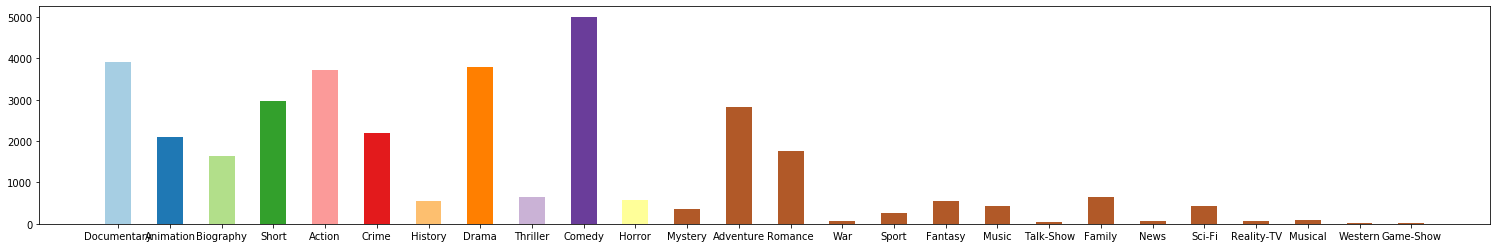

In [314]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

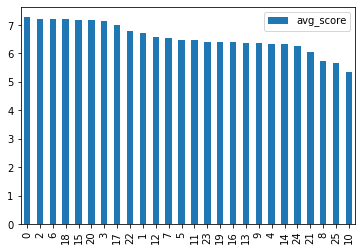

In [315]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [316]:
print(hist_df)

          genre  avg_score
0   Documentary   7.282134
2     Biography   7.226113
6       History   7.211009
18    Talk-Show   7.206250
15        Sport   7.184270
20         News   7.183544
3         Short   7.145302
17        Music   6.994688
22   Reality-TV   6.793056
1     Animation   6.703863
12    Adventure   6.568027
7         Drama   6.548717
5         Crime   6.487358
11      Mystery   6.455285
23      Musical   6.404082
19       Family   6.398905
16      Fantasy   6.398548
13      Romance   6.382935
9        Comedy   6.352087
4        Action   6.339892
14          War   6.330137
24      Western   6.254839
21       Sci-Fi   6.051843
8      Thriller   5.726900
25    Game-Show   5.678571
10       Horror   5.339261


- GENRE to number

In [317]:
#TF-IDF 

corpus = genre_rating_df["genre"].tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_genre = []
for i in range(len(genre_rating_df)):
    list_sum_genre.append(tfidf[i].sum())

In [318]:
sum_genre = pd.DataFrame(list_sum_genre)
sum_genre.isnull().values.any()


False

In [319]:
#add column into df
val_X_df["sum_genre"] = pd.Series(list_sum_genre).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [320]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre
32044,Nasseredin Shah and His 84 Wives,59,In 1842 the 11 year-old heir to the Persian th...,2011,"Documentary, Animation, Biography",Kate Pendry,Beate Petersen,122,NaN,1.717565
53034,The Pusher,0,"The Pusher is a coming of age crime drama,...",2013,"Short, Action, Crime","Aren Galuppo, Victor Boneva, Jeffrey Quinn",Justin Cunningham,5,NaN,1.726254
62086,Don't Blink - Robert Frank,82,Robert Frank revolutionized photography and in...,2015,"Documentary, Biography, History","Robert Frank, Sid Kaplan, June Leaf, William S...",Laura Israel,268,NaN,1.681546
49471,Rustom,148,A naval officer returns home to find out a...,2016,"Crime, Drama, Thriller","Akshay Kumar, Ileana D'Cruz, Esha Gupta, Manoj...",Dharmendra Suresh Desai,21066,$1.09M,1.686391
3999,Badass Monster Killer,96,"On the trashy side of Camaroville, there's a m...",2015,"Action, Comedy, Horror","Jawara Duncan, Amelia Belle, Ryan Cicak, Steph...",Darin Wood,81,NaN,1.643724


- CAST to number

In [321]:
#replace NaN element in cast to "other"
val_X_df["cast"] = val_X_df["cast"].fillna("other_cast");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [322]:

cast_rating_df = val_X_df["cast"].to_frame().join(val_y_sr)

from collections import Counter

list_cast = list(cast_rating_df.cast)
unique_cast = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_cast += g.strip().split(", ")
dict_cast = Counter(unique_cast)

print("len = ",len(dict_cast))


len =  36110


In [323]:
occur_cast = Counter(dict_cast.values())  #Số lần xuất hiện - Số diễn viên

occur_cast = {k: v for k, v in sorted(occur_cast.items(), key=lambda item: item[1], reverse = True)}

dict(list(occur_cast.items())[:10])

{1: 28292,
 2: 4811,
 3: 1382,
 4: 627,
 5: 367,
 6: 214,
 7: 126,
 8: 85,
 9: 62,
 10: 35}

In [324]:
cast_info = dict_cast.items()
cast_info = sorted(cast_info, key=lambda tup: tup[1], reverse=True)
cast_info[:10] #Từng diễn viên tương ứng với số lần đóng phim


[('other_cast', 144),
 ('Grey Griffin', 52),
 ('Troy Baker', 43),
 ('Laura Bailey', 38),
 ('Eric Bauza', 30),
 ('Fred Tatasciore', 27),
 ('John DiMaggio', 26),
 ('Jeff Bennett', 26),
 ('Sean Astin', 26),
 ('Tom Kenny', 26)]

# Nhận xét: Những diễn viên xuất hiện nhiều lần, thông thường được mọi người xem là hay. Những diễn viên xuất hiện ít, thường là những người mới hoặc diễn tệ.


In [325]:
#TF-IDF 

corpus = cast_rating_df.loc[cast_rating_df.cast.isnull() == False].cast.tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_cast = cast_rating_df.cast.copy()

list_sum = []
for i in range(len(cast_rating_df.loc[cast_rating_df.cast.isnull() == False])):
    list_sum.append(tfidf[i].sum())

list_sum_cast[list_sum_cast.isnull() == False] = list_sum
list_sum_cast[list_sum_cast.isnull() != False] = 0

In [326]:
sum_cast = pd.DataFrame(list_sum_cast)
sum_cast.isnull().values.any()


False

In [327]:
#add column into df
val_X_df["sum_cast"] = pd.Series(list_sum_cast).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [328]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast
32044,Nasseredin Shah and His 84 Wives,59,In 1842 the 11 year-old heir to the Persian th...,2011,"Documentary, Animation, Biography",Kate Pendry,Beate Petersen,122,NaN,1.717565,1.36089
53034,The Pusher,0,"The Pusher is a coming of age crime drama,...",2013,"Short, Action, Crime","Aren Galuppo, Victor Boneva, Jeffrey Quinn",Justin Cunningham,5,NaN,1.726254,2.41278
62086,Don't Blink - Robert Frank,82,Robert Frank revolutionized photography and in...,2015,"Documentary, Biography, History","Robert Frank, Sid Kaplan, June Leaf, William S...",Laura Israel,268,NaN,1.681546,2.74679
49471,Rustom,148,A naval officer returns home to find out a...,2016,"Crime, Drama, Thriller","Akshay Kumar, Ileana D'Cruz, Esha Gupta, Manoj...",Dharmendra Suresh Desai,21066,$1.09M,1.686391,2.81636
3999,Badass Monster Killer,96,"On the trashy side of Camaroville, there's a m...",2015,"Action, Comedy, Horror","Jawara Duncan, Amelia Belle, Ryan Cicak, Steph...",Darin Wood,81,NaN,1.643724,2.76694


- DIRECTOR to number

In [329]:
#replace NaN element in cast to "other"
val_X_df["director"] = val_X_df["director"].fillna("other_director");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [330]:

director_rating_df = val_X_df["director"].to_frame().join(val_y_sr)

from collections import Counter

list_director = list(director_rating_df.director)
unique_director = []
for g in list_cast:
    if(pd.isna(g) ==False):
        unique_director += g.strip().split(", ")
dict_director = Counter(unique_director)

print("len = ",len(dict_director))

len =  36110


In [331]:
#TF-IDF 

corpus =director_rating_df.loc[director_rating_df.director.isnull() == False].director.tolist()
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)


list_sum_director = director_rating_df.director.copy()
list_sum = []
for i in range(len(director_rating_df.loc[director_rating_df.director.isnull() == False])):
    list_sum.append(tfidf[i].sum())
list_sum_director[list_sum_director.isnull() == False] = list_sum
list_sum_director[list_sum_director.isnull() != False] = 0

In [332]:
sum_director = pd.DataFrame(list_sum_director)
sum_director.isnull().values.any()


False

In [333]:
#add column into df
val_X_df["sum_director"] = pd.Series(list_sum_director).values

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [334]:
val_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,sum_genre,sum_cast,sum_director
32044,Nasseredin Shah and His 84 Wives,59,In 1842 the 11 year-old heir to the Persian th...,2011,"Documentary, Animation, Biography",Kate Pendry,Beate Petersen,122,NaN,1.717565,1.36089,1.41178
53034,The Pusher,0,"The Pusher is a coming of age crime drama,...",2013,"Short, Action, Crime","Aren Galuppo, Victor Boneva, Jeffrey Quinn",Justin Cunningham,5,NaN,1.726254,2.41278,1.40757
62086,Don't Blink - Robert Frank,82,Robert Frank revolutionized photography and in...,2015,"Documentary, Biography, History","Robert Frank, Sid Kaplan, June Leaf, William S...",Laura Israel,268,NaN,1.681546,2.74679,1.41142
49471,Rustom,148,A naval officer returns home to find out a...,2016,"Crime, Drama, Thriller","Akshay Kumar, Ileana D'Cruz, Esha Gupta, Manoj...",Dharmendra Suresh Desai,21066,$1.09M,1.686391,2.81636,1.73205
3999,Badass Monster Killer,96,"On the trashy side of Camaroville, there's a m...",2015,"Action, Comedy, Horror","Jawara Duncan, Amelia Belle, Ryan Cicak, Steph...",Darin Wood,81,NaN,1.643724,2.76694,1.41199


- GROSS to number

In [335]:
#replace NaN element in cast to "other"
val_X_df["gross"] = val_X_df["gross"].fillna("0.0");

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [336]:

#define money
money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
for i in range(len(val_X_df)):
    
    val_X_df.gross.iloc[i] = float(re.findall("\d+\.\d+", val_X_df.gross.iloc[i])[0]) * money[val_X_df.gross.iloc[i][-1]]

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [337]:

dict_gross = Counter(val_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

{0.0: 13333,
 10000.0: 97,
 20000.0: 68,
 30000.0: 45,
 40000.0: 41,
 120000.0: 24,
 60000.0: 24,
 90000.0: 23,
 70000.0: 20,
 50000.0: 17,
 110000.0: 15,
 80000.0: 14,
 100000.0: 14,
 160000.0: 10,
 150000.0: 10,
 130000.0: 9,
 170000.0: 8,
 200000.0: 7,
 310000.0: 7,
 210000.0: 7}

# Nhận thấy: số lượng "0.0" chiếm quá nhiều, gây chênh lệnh lớn. Sử dụng median để thay thế

In [338]:
imp = SimpleImputer(missing_values = 0, strategy='median')
val_X_df["gross"] = imp.fit_transform(val_X_df[["gross"]]).ravel()


dict_gross = Counter(val_X_df.gross)
dict_gross = {k: v for k, v in sorted(dict_gross.items(), key=lambda item: item[1], reverse = True)} #sort

dict(list(dict_gross.items())[:20])

D:\app\anaconda\run\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


{1495000.0: 13333,
 10000.0: 97,
 20000.0: 68,
 30000.0: 45,
 40000.0: 41,
 120000.0: 24,
 60000.0: 24,
 90000.0: 23,
 70000.0: 20,
 50000.0: 17,
 110000.0: 15,
 80000.0: 14,
 100000.0: 14,
 160000.0: 10,
 150000.0: 10,
 130000.0: 9,
 170000.0: 8,
 200000.0: 7,
 310000.0: 7,
 210000.0: 7}

In [339]:
val_X_df = val_X_df.drop(['cast',"genre","director","date"], axis = 1)
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
32044,Nasseredin Shah and His 84 Wives,59,In 1842 the 11 year-old heir to the Persian th...,122,1495000.0,1.717565,1.36089,1.41178
53034,The Pusher,0,"The Pusher is a coming of age crime drama,...",5,1495000.0,1.726254,2.41278,1.40757
62086,Don't Blink - Robert Frank,82,Robert Frank revolutionized photography and in...,268,1495000.0,1.681546,2.74679,1.41142
49471,Rustom,148,A naval officer returns home to find out a...,21066,1090000.0,1.686391,2.81636,1.73205
3999,Badass Monster Killer,96,"On the trashy side of Camaroville, there's a m...",81,1495000.0,1.643724,2.76694,1.41199


# scaling

In [340]:
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
32044,Nasseredin Shah and His 84 Wives,59,In 1842 the 11 year-old heir to the Persian th...,122,1495000.0,1.717565,1.36089,1.41178
53034,The Pusher,0,"The Pusher is a coming of age crime drama,...",5,1495000.0,1.726254,2.41278,1.40757
62086,Don't Blink - Robert Frank,82,Robert Frank revolutionized photography and in...,268,1495000.0,1.681546,2.74679,1.41142
49471,Rustom,148,A naval officer returns home to find out a...,21066,1090000.0,1.686391,2.81636,1.73205
3999,Badass Monster Killer,96,"On the trashy side of Camaroville, there's a m...",81,1495000.0,1.643724,2.76694,1.41199


In [341]:
scl = StandardScaler()
val_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]]=scl.fit_transform(val_X_df[["runtime","vote", "gross", "sum_genre", "sum_cast", "sum_director"]])

In [342]:
val_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
32044,Nasseredin Shah and His 84 Wives,0.011945,In 1842 the 11 year-old heir to the Persian th...,-0.160407,-0.119147,0.774241,-2.540589,0.075976
53034,The Pusher,-1.222821,"The Pusher is a coming of age crime drama,...",-0.162821,-0.119147,0.804877,-0.364364,0.064827
62086,Don't Blink - Robert Frank,0.493294,Robert Frank revolutionized photography and in...,-0.157394,-0.119147,0.647230,0.326662,0.075038
49471,Rustom,1.874558,A naval officer returns home to find out a...,0.271757,-0.135058,0.664316,0.470597,0.924567
3999,Badass Monster Killer,0.786290,"On the trashy side of Camaroville, there's a m...",-0.161253,-0.119147,0.513864,0.368341,0.076529


# To CSV

In [343]:
train_X_df.to_csv("./processed_data/train_X_df.csv",index = False, header = True)
train_y_sr.to_csv("./processed_data/train_y_sr.csv",index = False, header = True)
val_X_df.to_csv("./processed_data/val_X_df.csv",index = False, header = True)
val_y_sr.to_csv("./processed_data/val_y_sr.csv",index = False, header = True)

In [344]:
train_X_df = pd.read_csv("./processed_data/train_X_df.csv")
train_y_sr = pd.read_csv("./processed_data/train_y_sr.csv")


In [345]:
train_X_df.head()

,title,runtime,des,vote,gross,sum_genre,sum_cast,sum_director
0,Lint the Movie,0.899029,Documents the life and work of cult SF author ...,-0.165576,-0.117640,1.496379,0.317929,0.334017
1,Broken Chains,-1.237446,Brianna married a man she thought would pr...,-0.165576,-0.117640,0.760571,0.321192,0.394587
2,The Tattooist,-0.243244,"In ""The Tattooist,"" Rooster Teeth's Geoff Rams...",-0.165490,-0.117640,-1.778006,-0.814768,0.397553
3,Fairy Fencer F: Advent Dark Force,-1.237446,A long time ago there was a conflict between a...,-0.164480,-0.117640,0.600956,0.485044,-1.521668
4,Wild Oats,0.581731,Everything changes for Eva when she receiv...,-0.100232,-0.180534,0.786334,0.416285,0.330136
